# Analysis of YouTube Watch & Search History

The internet has changed the way we consume media, and platforms like YouTube have emerged as significant sources of information and entertainment. As a frequent user of YouTube, I've often wondered about my viewing habits. What patterns might emerge from a careful examination of the videos I watch, the channels I frequent, and the times I choose to engage with this platform?

<br> To answer these questions, I have collected my YouTube watch history and search history in JSON formats, providing a rich dataset that includes information such as video titles, viewing times, and associated channels. This dataset provides a unique opportunity to dive deep into my personal YouTube use and uncover any interesting trends or patterns.

## Dataset Overview

1. **YouTube Watch History('watch-history.json')**: This dataset contains my personal YouTube watch history. The data is stored in JSON format with the following attributes:
    * **'header'**: This field indicates the platform, which in this case is always "YouTube".

    * **'title'**: This field contains the action and the title of the video watched. The action is always "Watched" followed by the video title.
    
    * **'titleUrl'**: This field contains the URL of the watched video.
    * **'subtitles'**: This field includes the channel name and the URL of the channel.
    * **'time'**: This field records the timestamp of the watch action in the format "YYYY-MM-DDTHH:MM:SS.SSSZ".
    * **'products'**: This field indicates the platform's product used, which in this case is always "YouTube".
    * **'activityControls'**: This field indicates the type of activity, which in this case is always "YouTube watch history".
2. **YouTube Search History ('search-history.json')**: This dataset contains my personal YouTube search history. The data is stored in JSON format with the following attributes:
    * **'header'**: Similar to the watch history, this field indicates the platform, which is always "YouTube".

    * **'title'**: This field contains the action and the search term used. The action is always "Searched for" followed by the search term.
    
    * **'titleUrl'**: This field contains the URL of the search results.
    * **'time'**: This field records the timestamp of the search action in the format "YYYY-MM-DDTHH:MM:SS.SSSZ".
    * **'products'**: This field indicates the platform's product used, which in this case is always "YouTube".
    * **'activityControls'**: This field indicates the type of activity, which in this case is always "YouTube search history".

<br> The goal of this project is to analyze these datasets to uncover insights and patterns about my YouTube viewing and searching habits. I'll be investigating aspects such as the distribution of watch times, the most commonly watched channels, the most commonly used search terms, and how these aspects might have changed over time.

## Project Goals
In this project, I will leverage Python and SQL, along with various libraries like pandas for data manipulation, NLTK for natural language processing, and matplotlib for visualization, to explore my YouTube watch history. The steps I plan to follow are:

<br> 1. **Understanding the data**: I'll start by examining the structure of the JSON file and identifying the range of dates covered in the watch history.

<br> 2. **Data Cleaning**: I will transform the JSON data into a pandas DataFrame for easier analysis, handle any missing or inconsistent fields, and convert data types where necessary.

<br> 3. **Exploratory Data Analysis (EDA)**: Here, I'll look at the distribution of my watch times, how my YouTube usage has evolved over time, and identify the channels and video categories I watch the most.

<br> 4. **Natural Language Processing (NLP) with NLTK**: I'll use NLP techniques to identify common words in video titles, classify titles into different topics, and analyze the sentiment of the video titles.

<br> 5. **Further Analysis**: I'll look for trends or patterns in the types of videos I watch, explore correlations between video lengths and my watch times, and even attempt to predict future watching habits based on my historical data.

<br> 6. **Data Visualization**: Finally, I'll create various visualizations to better understand my data and share my findings.

Through this project, I hope to gain insights into my personal YouTube usage and demonstrate how data science techniques can be applied to analyze and understand digital media consumption. Let's dive in!





## Import Libraries

In [126]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import nltk
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob



## Load the Datasets

In [127]:
# Load the JSON files into Python
with open('watch-history.json') as f:
    watch_data = json.load(f)

with open('search-history.json') as f:
    search_data = json.load(f)

# Convert the data to pandas DataFrames for easier analysis
watch_df = pd.json_normalize(watch_data)
search_df = pd.json_normalize(search_data)

## 1. Understanding the Data

After loading the datasets, I want to see what are the attributes are, .info() allows me to see what columns are there, what kinds of datatypes corresponds to the columns and how many rows that have values for each attribute

In [128]:
# Print the schema of the DataFrames
watch_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   header            33000 non-null  object
 1   title             33000 non-null  object
 2   titleUrl          32704 non-null  object
 3   subtitles         27046 non-null  object
 4   time              33000 non-null  object
 5   products          33000 non-null  object
 6   activityControls  33000 non-null  object
 7   details           3586 non-null   object
 8   description       3481 non-null   object
dtypes: object(9)
memory usage: 2.3+ MB


.head() allows me to see through the first five rows of the data in the dataset

In [129]:
watch_df.head()

,header,title,titleUrl,subtitles,time,products,activityControls,details,description
0,YouTube,Watched DATA ANALYST PORTFOLIO | 10 PROJECT IDEAS,https://www.youtube.com/watch?v=wObV_hwu2QM,"[{'name': 'Data With Mo', 'url': 'https://www....",2023-06-13T05:08:50.583Z,[YouTube],[YouTube watch history],NaN,NaN
1,YouTube,Watched 英文弱底托福備考必看|多益300➡️五戰托福87➡️錄取美國top10名校西...,https://www.youtube.com/watch?v=L22WnGtDXII,"[{'name': 'Olivia Hsü', 'url': 'https://www.yo...",2023-06-13T05:02:37.431Z,[YouTube],[YouTube watch history],NaN,NaN
2,YouTube,Watched 為什麼你不需要蘋果M2 Max,https://www.youtube.com/watch?v=GoDzWt6ESh8,"[{'name': 'HackBear 泰瑞', 'url': 'https://www.y...",2023-06-13T04:56:05.134Z,[YouTube],[YouTube watch history],NaN,NaN
3,YouTube,Watched HELIX_CGI_MASTHEAD_30_SEC_16X9_ESRB,https://www.youtube.com/watch?v=9X9kI4Mtat0,NaN,2023-06-13T04:55:57.289Z,[YouTube],[YouTube watch history],[{'name': 'From Google Ads'}],NaN
4,YouTube,Watched 【Uncle Roger】專業歌手Joji和Rich Brian挑戰做泡麵，...,https://www.youtube.com/watch?v=EuffmcKzi0I,"[{'name': 'mrnigelng 官方中文頻道', 'url': 'https://...",2023-06-13T04:52:50.100Z,[YouTube],[YouTube watch history],NaN,NaN


In [130]:
search_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11623 entries, 0 to 11622
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   header            11623 non-null  object
 1   title             11623 non-null  object
 2   titleUrl          11621 non-null  object
 3   time              11623 non-null  object
 4   products          11623 non-null  object
 5   activityControls  11623 non-null  object
 6   description       3673 non-null   object
 7   details           3767 non-null   object
 8   subtitles         2 non-null      object
dtypes: object(9)
memory usage: 817.4+ KB


In [131]:
search_df.head()

,header,title,titleUrl,time,products,activityControls,description,details,subtitles
0,YouTube,Searched for how to get my own youtube watch h...,https://www.youtube.com/results?search_query=h...,2023-06-13T05:05:03.173Z,[YouTube],[YouTube search history],NaN,NaN,NaN
1,YouTube,Searched for sherlock holmes 2 forest scene,https://www.youtube.com/results?search_query=s...,2023-06-13T03:06:40.690Z,[YouTube],[YouTube search history],NaN,NaN,NaN
2,YouTube,Watched Google Fiber Webpass - We're expanding...,https://www.youtube.com/watch?v=IEwl7VcXEhw,2023-06-12T23:19:37.052Z,[YouTube],"[Web & App Activity, YouTube watch history, Yo...",Watched at 4:19 PM,[{'name': 'From Google Ads'}],NaN
3,YouTube,Watched DNU Coding Dojo | Learn Skills for Web...,https://www.youtube.com/watch?v=oI8QFcn8fAM,2023-06-12T23:16:23.084Z,[YouTube],"[Web & App Activity, YouTube watch history, Yo...",Watched at 4:16 PM,[{'name': 'From Google Ads'}],NaN
4,YouTube,Watched Pixel 7 Pro - Macro Focus & Super Res ...,https://www.youtube.com/watch?v=j3gvPOK6gc0,2023-06-12T23:07:50.992Z,[YouTube],"[Web & App Activity, YouTube watch history, Yo...",Watched at 4:07 PM,[{'name': 'From Google Ads'}],NaN


This leads to me printing out the columns for each datasets, which allows me to compare these lists to see if tehre are any fields present in one dataset but not in the other.

In [132]:
# Print the columns in each DataFrame
print("Watch history columns: ", watch_df.columns.tolist())
print("Search history columns: ", search_df.columns.tolist())

Watch history columns:  ['header', 'title', 'titleUrl', 'subtitles', 'time', 'products', 'activityControls', 'details', 'description']
Search history columns:  ['header', 'title', 'titleUrl', 'time', 'products', 'activityControls', 'description', 'details', 'subtitles']


For the mapping entries in the search history to entries in the watch history, it is quite challenging because the datasets do not include unique identiers that link a search to a subsequent watch action, however, I make some inferences based on the timestamps. If a watch action occurs shortly after a search action, it is possible that the watch action was a result of the search.

In [133]:
# Convert 'time' to datetime format in both DataFrames
watch_df['time'] = pd.to_datetime(watch_df['time'])
search_df['time'] = pd.to_datetime(search_df['time'])

# Sort both DataFrames by 'time'
watch_df = watch_df.sort_values('time')
search_df = search_df.sort_values('time')

# Reset the indices of both DataFrames
watch_df = watch_df.reset_index(drop=True)
search_df = search_df.reset_index(drop=True)

# For each search, find the next watch action
search_df['next_watch'] = None
for i in range(len(search_df) - 1):
    # Find the next watch action that occured after the search
    next_watch = watch_df[watch_df['time'] > search_df.loc[i, 'time']].iloc[0]
    search_df.loc[i, 'next_watch'] = next_watch['title']

print(search_df)


        header                                              title  \
0      YouTube                     Searched for john walker blues   
1      YouTube                           Searched for john walker   
2      YouTube                      Searched for john walker wine   
3      YouTube         Searched for john walker wine keep walking   
4      YouTube             Searched for johnnie walker commercial   
...        ...                                                ...   
11618  YouTube  Watched Pixel 7 Pro - Macro Focus & Super Res ...   
11619  YouTube  Watched DNU Coding Dojo | Learn Skills for Web...   
11620  YouTube  Watched Google Fiber Webpass - We're expanding...   
11621  YouTube       Searched for sherlock holmes 2 forest scene    
11622  YouTube  Searched for how to get my own youtube watch h...   

                                                titleUrl  \
0      https://www.youtube.com/results?search_query=j...   
1      https://www.youtube.com/results?search_query

This allows me to explore my youtube watch and search history's range of dates coverage

In [134]:
# Get the minimum and maximum times in the watch history
watch_min_date = watch_df['time'].min()
watch_max_date = watch_df['time'].max()

# Get the minimum and maximum times in the search history
search_min_date = search_df['time'].min()
search_max_date = search_df['time'].max()

print(f"Watch history date range: {watch_min_date} to {watch_max_date}")
print(f"Search history date range: {search_min_date} to {search_max_date}")


Watch history date range: 2021-12-14 21:32:58.834000+00:00 to 2023-06-13 05:08:50.583000+00:00
Search history date range: 2019-03-10 22:00:46.448000+00:00 to 2023-06-13 05:05:03.173000+00:00


## 2. Data Cleaning

I merged the two datasets to create a unified datasets by concatenating the two dataframes along the time axis.

In [135]:
watch_df = watch_df.dropna(subset=['titleUrl'])
search_df = search_df.dropna(subset=['titleUrl'])


In [136]:
watch_df = watch_df.fillna("NA")
search_df = search_df.fillna("NA")

In [137]:
# Concatenate the two datasets
combined_df = pd.concat([watch_df, search_df])

# Sort by time
combined_df = combined_df.sort_values(by='time')

# Reset index
combined_df = combined_df.reset_index(drop=True)

combined_df = combined_df.fillna("NA")



In [138]:
combined_df.head()

,header,title,titleUrl,subtitles,time,products,activityControls,details,description,next_watch
0,YouTube,Searched for john walker blues,https://www.youtube.com/results?search_query=j...,NA,2019-03-10 22:00:46.448000+00:00,[YouTube],[YouTube search history],NA,NA,Watched https://www.youtube.com/watch?v=aJzj4j...
1,YouTube,Searched for john walker,https://www.youtube.com/results?search_query=j...,NA,2019-03-10 22:00:59.580000+00:00,[YouTube],[YouTube search history],NA,NA,Watched https://www.youtube.com/watch?v=aJzj4j...
2,YouTube,Searched for john walker wine,https://www.youtube.com/results?search_query=j...,NA,2019-03-10 22:01:28.304000+00:00,[YouTube],[YouTube search history],NA,NA,Watched https://www.youtube.com/watch?v=aJzj4j...
3,YouTube,Searched for john walker wine keep walking,https://www.youtube.com/results?search_query=j...,NA,2019-03-10 22:01:39.089000+00:00,[YouTube],[YouTube search history],NA,NA,Watched https://www.youtube.com/watch?v=aJzj4j...
4,YouTube,Searched for johnnie walker commercial,https://www.youtube.com/results?search_query=j...,NA,2019-03-10 22:01:44.455000+00:00,[YouTube],[YouTube search history],NA,NA,Watched https://www.youtube.com/watch?v=aJzj4j...


In [139]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44325 entries, 0 to 44324
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   header            44325 non-null  object             
 1   title             44325 non-null  object             
 2   titleUrl          44325 non-null  object             
 3   subtitles         44325 non-null  object             
 4   time              44325 non-null  datetime64[ns, UTC]
 5   products          44325 non-null  object             
 6   activityControls  44325 non-null  object             
 7   details           44325 non-null  object             
 8   description       44325 non-null  object             
 9   next_watch        44325 non-null  object             
dtypes: datetime64[ns, UTC](1), object(9)
memory usage: 3.4+ MB


In this section, I am checking for missing values in our datasets. Missing values can present challenges during the analysis phase, and it's important to identify where these missing values exist so that we can make informed decisions about how to handle them.

I will perform this check on the watch history, search history, and the combined history datasets separately.

Watch History Missing Values Check: This code checks for any missing or NaN values in the watch history dataset (watch_df). The isnull() function will return a DataFrame where each cell is either True (if the original cell is null) or False (if the cell is not null). The sum() function then adds up the True values column-wise, providing a count of missing values for each column in watch_df.

Search History Missing Values Check: Similarly, this code checks for any missing values in the search history dataset (search_df).

Combined History Missing Values Check: Finally, we check for missing values in the combined dataset (combined_df), which includes both watch and search history data.

The print statements will output the number of missing values in each column of the respective datasets. If a column has zero missing values, it means that every record in that column has a value. However, if a column has a number greater than zero, it indicates that some records are missing data in that column.

In the next step of the analysis, we would need to decide how to handle these missing values, which might include filling in the missing data (if applicable), or excluding the affected records from certain parts of the analysis.

In [140]:
# Check for missing values in the watch history
print(watch_df.isnull().sum())

# Check for missing values in the search history
print(search_df.isnull().sum())

# Check for missing values in the combined history
print(combined_df.isnull().sum())


header              0
title               0
titleUrl            0
subtitles           0
time                0
products            0
activityControls    0
details             0
description         0
dtype: int64
header              0
title               0
titleUrl            0
time                0
products            0
activityControls    0
description         0
details             0
subtitles           0
next_watch          0
dtype: int64
header              0
title               0
titleUrl            0
subtitles           0
time                0
products            0
activityControls    0
details             0
description         0
next_watch          0
dtype: int64


## 3. Exploratory Data Analysis

In this section, I wanted to know how my watch frequency fluctuates during the hours of the day and days of the week. First I created two columns: 'hour' and 'day_of_week'. These columns are derived from the 'time' column and will make it easier to analyze the distribution of watch times throughout the day and week

In [141]:
# Create a new column for the hour of the day
watch_df['hour'] = watch_df['time'].dt.hour

# Create a new column for the day of the week
watch_df['day_of_week'] = watch_df['time'].dt.day_name()  # or dt.dayofweek for numerical representation


Here I am calculating the frequency of video watches for each hour of the day and each day of the week. then I am normalizing these frequencies by the total number of days in the dataset to get the average number of videos watched per day at each hour and on each day of the week

In [142]:
# Frequency of watches for each hour
hourly_distribution = watch_df['hour'].value_counts().sort_index()

# Frequency of watches for each day of the week
weekly_distribution = watch_df['day_of_week'].value_counts()

# Calculate the number of days in the data range
num_days = (watch_df['time'].max() - watch_df['time'].min()).days

# Normalize the hourly and weekly distributions by the number of days
hourly_distribution = hourly_distribution / num_days
weekly_distribution = weekly_distribution / num_days


Now I am visualizing the data I have computed in the previous code chunk. The first plot shows the average number of videos watched per day at each hour, and the second plot shows the average number of videos watched per day on each day of the week. There plots help me better understand my Youtube watching habits

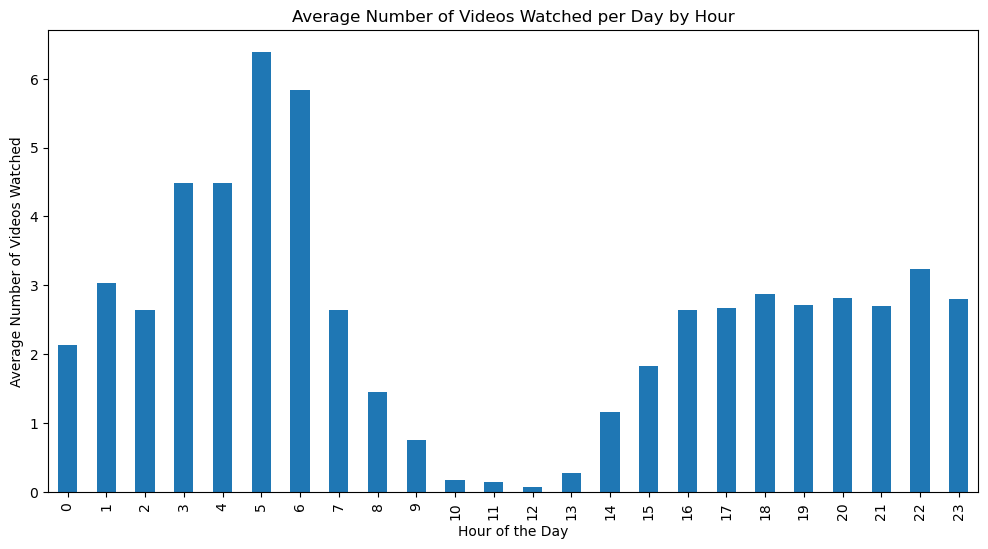

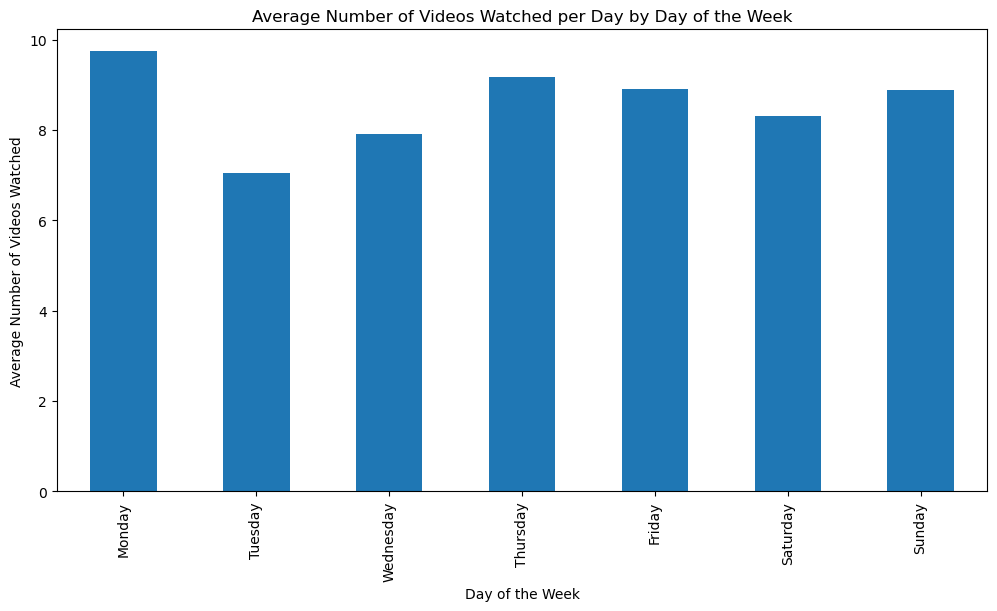

In [143]:
# Plot the average number of videos watched per day for each hour
hourly_distribution.plot(kind='bar', figsize=(12,6))
plt.title('Average Number of Videos Watched per Day by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Videos Watched')
plt.show()

# Plot the average number of videos watched per day for each day of the week
weekly_distribution = weekly_distribution.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])  # to ensure the days of the week are in order
weekly_distribution.plot(kind='bar', figsize=(12,6))
plt.title('Average Number of Videos Watched per Day by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Number of Videos Watched')
plt.show()



This code is similar to what I have coded just now. I am calculating the frequency of video watches for each hour of the day and each day of the week. However, unlike in the previous code chunk, I am not normalizing these frequencies by the number of days in the dataset

In [144]:
# Frequency of watches for each hour
hourly_distribution = watch_df['hour'].value_counts().sort_index()

# Frequency of watches for each day of the week
weekly_distribution = watch_df['day_of_week'].value_counts()



Lastly, I am again visualizing the data, but this time I am showing the cumulative distribution of watch times thoughout the day and week. This allows me to see the total number of videos watched at each hour and on each day of the week over the entire duration of the dataset. These plots provide a holistic view of my YouTube watching habits, rather than the average daily habits I visualized earleir.

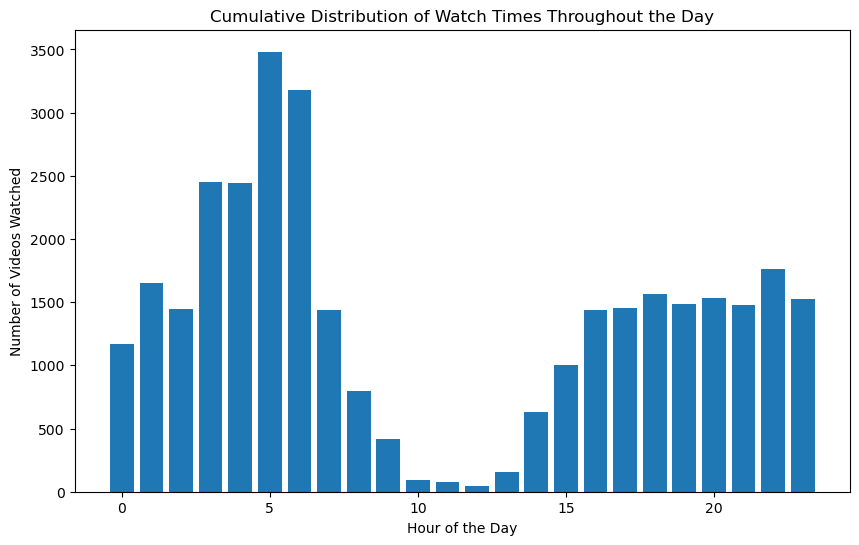

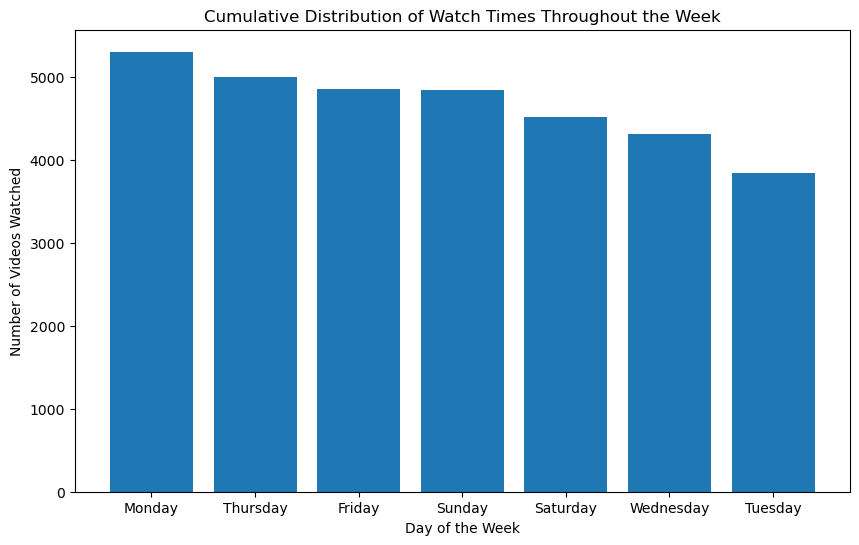

In [145]:
import matplotlib.pyplot as plt

# Plot the hourly distribution
plt.figure(figsize=(10, 6))
plt.bar(hourly_distribution.index, hourly_distribution.values)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Videos Watched')
plt.title('Cumulative Distribution of Watch Times Throughout the Day')
plt.show()

# Plot the weekly distribution
plt.figure(figsize=(10, 6))
plt.bar(weekly_distribution.index, weekly_distribution.values)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Videos Watched')
plt.title('Cumulative Distribution of Watch Times Throughout the Week')
plt.show()


For this part, I wanted to know how my YouTube usage has changed over time, to determine that whether I watched more or fewer videos now than in the past. I first extract the date from the 'time' column. This can be done using dt.date attribute in the pandas

In [146]:
watch_df['date'] = watch_df['time'].dt.date

Then I count the number of videos watched each day by using the 'value_counts()' function and sort them by date:

In [147]:
watch_counts_by_date = watch_df['date'].value_counts().sort_index()


Finally I can visualize the data with a line plot to show the trend of YouTube usage over time:

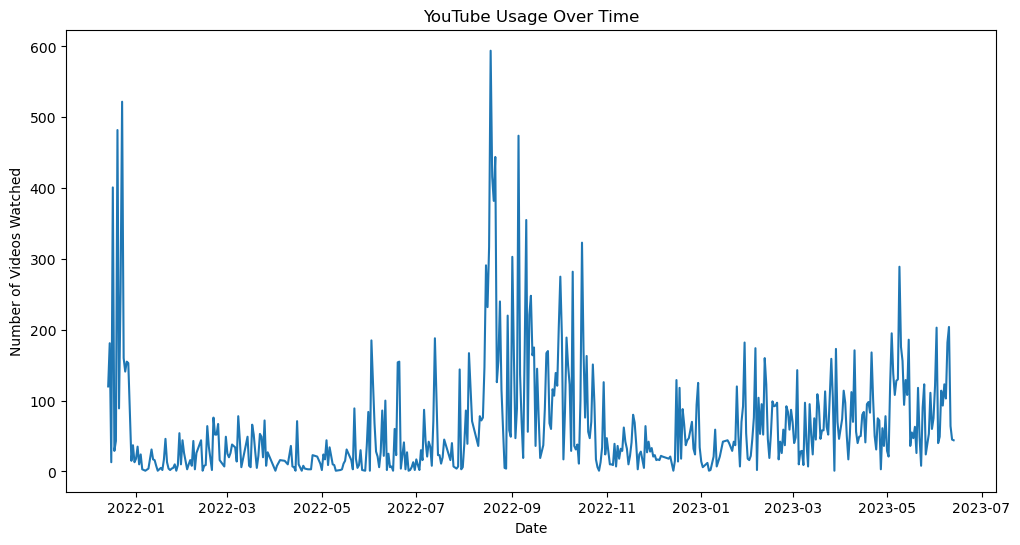

In [148]:
plt.figure(figsize=(12,6))
watch_counts_by_date.plot(kind='line')
plt.title('YouTube Usage Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Videos Watched')
plt.show()

It looks hard to tell, I can watch more videos in some months but watch less videos in different months. After this, I want to know what the most common channels I watch throughout the time

In this part, I want to figure out what First I need to get rid of the NA values from the subtitles column such that the most 

In [149]:
invalid_entries = watch_df['subtitles'] == 'NA'
watch_df = watch_df[~invalid_entries]


In [150]:
watch_df


,header,title,titleUrl,subtitles,time,products,activityControls,details,description,hour,day_of_week,date
101,YouTube,Watched 为什么猪场里一定不能养猫呢？,https://www.youtube.com/watch?v=crxP2epmEPo,"[{'name': '笑笑科普', 'url': 'https://www.youtube....",2021-12-14 23:30:36.287000+00:00,[YouTube],[YouTube watch history],NA,NA,23,Tuesday,2021-12-14
102,YouTube,Watched 普京回击中国威胁论：拿中国来吓唬我的人，自己被吓坏了。,https://www.youtube.com/watch?v=aJJVGSBlY0I,"[{'name': 'fearless4L9', 'url': 'https://www.y...",2021-12-14 23:30:59.543000+00:00,[YouTube],[YouTube watch history],NA,NA,23,Tuesday,2021-12-14
103,YouTube,Watched 成年人的崩溃往往只在一瞬间,https://www.youtube.com/watch?v=X-wdFK8N41g,"[{'name': '文化红人馆', 'url': 'https://www.youtube...",2021-12-14 23:31:15.680000+00:00,[YouTube],[YouTube watch history],NA,NA,23,Tuesday,2021-12-14
105,YouTube,Watched POWER OF A PREY TO PROTECT ITS SELF FR...,https://www.youtube.com/watch?v=W5u99192qIA,"[{'name': 'karan@ YT', 'url': 'https://www.you...",2021-12-14 23:31:31.566000+00:00,[YouTube],[YouTube watch history],NA,NA,23,Tuesday,2021-12-14
106,YouTube,Watched 下暴雪时高铁是怎样运行的？,https://www.youtube.com/watch?v=-ZIXUW9CerY,"[{'name': '笑笑科普', 'url': 'https://www.youtube....",2021-12-14 23:31:45.222000+00:00,[YouTube],[YouTube watch history],NA,NA,23,Tuesday,2021-12-14
...,...,...,...,...,...,...,...,...,...,...,...,...
32994,YouTube,Watched Uncle Roger羅傑叔叔本人來啦！｜mrnigelng官方中文頻道,https://www.youtube.com/watch?v=Kx90uOg_QXM,"[{'name': 'mrnigelng 官方中文頻道', 'url': 'https://...",2023-06-13 04:52:18.569000+00:00,[YouTube],[YouTube watch history],NA,NA,4,Tuesday,2023-06-13
32995,YouTube,Watched 【Uncle Roger】專業歌手Joji和Rich Brian挑戰做泡麵，...,https://www.youtube.com/watch?v=EuffmcKzi0I,"[{'name': 'mrnigelng 官方中文頻道', 'url': 'https://...",2023-06-13 04:52:50.100000+00:00,[YouTube],[YouTube watch history],NA,NA,4,Tuesday,2023-06-13
32997,YouTube,Watched 為什麼你不需要蘋果M2 Max,https://www.youtube.com/watch?v=GoDzWt6ESh8,"[{'name': 'HackBear 泰瑞', 'url': 'https://www.y...",2023-06-13 04:56:05.134000+00:00,[YouTube],[YouTube watch history],NA,NA,4,Tuesday,2023-06-13
32998,YouTube,Watched 英文弱底托福備考必看|多益300➡️五戰托福87➡️錄取美國top10名校西...,https://www.youtube.com/watch?v=L22WnGtDXII,"[{'name': 'Olivia Hsü', 'url': 'https://www.yo...",2023-06-13 05:02:37.431000+00:00,[YouTube],[YouTube watch history],NA,NA,5,Tuesday,2023-06-13


In [151]:
# We'll extract this from the first (and only) dictionary in the 'subtitles' list, if it exists.
watch_df['channel'] = watch_df['subtitles'].apply(lambda x: x[0]['name'] if x else None)

# Now, we can get the most common channels by counting the values in the 'channel' column.
most_common_channels = watch_df['channel'].value_counts()

# Print the top 10 most common channels
print(most_common_channels.head(10))

ICC Worship Leaders    115
Lionfield               88
KWOOWK                  80
chefkoudy               79
KingChris               74
InterestingDaily        71
ARGEN                   70
Max the Meat Guy        70
Noel Deyzel             69
masteroogwgay           68
Name: channel, dtype: int64


In [152]:
# Calculate the frequency of each unique title in the 'title' column of the watch_df DataFrame
video_counts = watch_df['title'].value_counts()

# Get the top 10 most watched videos
most_common_videos = video_counts.head(10)

print(most_common_videos)

Watched Wade in the Water                                                                                       26
Watched #funnyshorts #shorts #shortscomedy #funnyvideos #funny #comedy #viral #viralvideo #viralshorts #haha    21
Watched Sigma                                                                                                   16
Watched #shorts                                                                                                 15
Watched For Honor reveal trailer Soundtrack 2015                                                                14
Watched OTAKU                                                                                                   14
Watched memes from internet                                                                                     14
Watched Reject Modernity, Embrace Masculinity                                                                   12
Watched Assassins creed Light em up x Radioactive Mashup GMV                    

/Users/haochenmiao/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12304 (\N{LEFT BLACK LENTICULAR BRACKET}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/haochenmiao/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26446 (\N{CJK UNIFIED IDEOGRAPH-674E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/haochenmiao/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 24120 (\N{CJK UNIFIED IDEOGRAPH-5E38}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/haochenmiao/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 36229 (\N{CJK UNIFIED IDEOGRAPH-8D85}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/haochenmiao/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20094 (\N{CJK UNIFIE

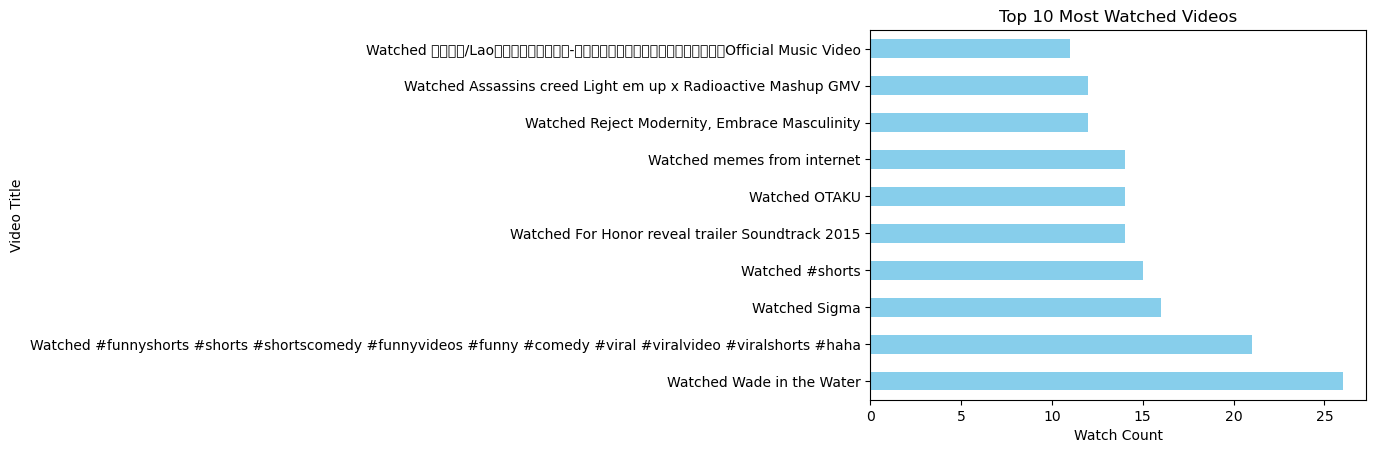

In [153]:
# Create a bar chart of the most watched videos
most_common_videos.plot(kind='barh', color='skyblue')

# Set labels and title
plt.xlabel('Watch Count')
plt.ylabel('Video Title')
plt.title('Top 10 Most Watched Videos')

# Display the plot
plt.show()

In [154]:
# Create a new 'search_term' column in the DataFrame that contains the search terms.
search_df['search_term'] = search_df['title'].str.replace('Searched for ', '', regex=True)

# Check the first few rows of the DataFrame to make sure the search terms were extracted correctly.
print(search_df.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 11621 entries, 0 to 11622
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   header            11621 non-null  object             
 1   title             11621 non-null  object             
 2   titleUrl          11621 non-null  object             
 3   time              11621 non-null  datetime64[ns, UTC]
 4   products          11621 non-null  object             
 5   activityControls  11621 non-null  object             
 6   description       11621 non-null  object             
 7   details           11621 non-null  object             
 8   subtitles         11621 non-null  object             
 9   next_watch        11621 non-null  object             
 10  search_term       11621 non-null  object             
dtypes: datetime64[ns, UTC](1), object(10)
memory usage: 1.1+ MB
None


In [155]:
# Count the occurrence of each unique value in the 'search_term' column and display the top 10.
print(search_df['search_term'].value_counts().head(10))


naruto theme                                                                                56
mongol                                                                                      50
Watched Ka'Chava - The World's Healthiest All-In-One Meal Shake.                            49
Watched Ka'Chava - The World's Healthiest Superfood Breakfast In Seconds                    44
gladiator beginning scene                                                                   41
Watched Getting Started in Therapy with BetterHelp                                          37
guitar                                                                                      37
Watched Michael, Data Analytics Certificate Graduate — Google Career Certificates (:15s)    35
for honor trailer                                                                           34
Watched Find your path                                                                      30
Name: search_term, dtype: int64


In [156]:
# Sort both dataframes by time
search_df = search_df.sort_values('time')
watch_df = watch_df.sort_values('time')

# Initialize a counter for searches that lead to a watch
search_leads_to_watch = 0

# Loop through the search dataframe
for i in range(len(search_df)-1):
    # Check if the next event is a watch event
    if search_df.iloc[i+1]['header'] == 'YouTube' and 'Watched' in search_df.iloc[i+1]['title']:
        # If it is, increment the counter
        search_leads_to_watch += 1

# Calculate the proportion of searches that lead to a watch
proportion = search_leads_to_watch / len(search_df)

print(f'The proportion of searches that lead to a watch is {proportion}')


The proportion of searches that lead to a watch is 0.3160657430513725


Average time difference: 19530.557640565443
Minimum time difference: 0.71
Maximum time difference: 383642.381


<Axes: >

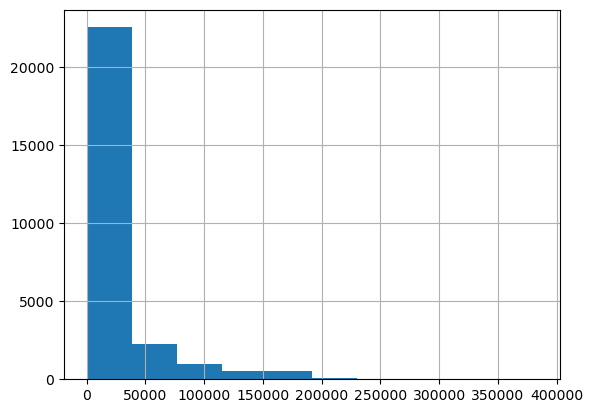

In [157]:
# Sort the DataFrames by 'time' in descending order
watch_df = watch_df.sort_values('time', ascending=False)
search_df = search_df.sort_values('time', ascending=False)

# Initialize a list to store the time differences
time_diffs = []

# Iterate over the watch events
for i, watch_row in watch_df.iterrows():
    # Find the most recent search event that occurred before the watch event
    search_row = search_df[search_df['time'] < watch_row['time']].iloc[0]
    
    # Calculate the time difference and append it to the list
    time_diff = watch_row['time'] - search_row['time']
    time_diffs.append(time_diff)

# Convert the time differences to a pandas Series
time_diffs_series = pd.Series(time_diffs)

# Convert the time differences to seconds
time_diffs_seconds = time_diffs_series.dt.total_seconds()

# Analyze the time differences
print('Average time difference:', time_diffs_seconds.mean())
print('Minimum time difference:', time_diffs_seconds.min())
print('Maximum time difference:', time_diffs_seconds.max())

# Create a histogram
time_diffs_seconds.hist()

## 3. Natural Language Processing (NLP) with NLTK:

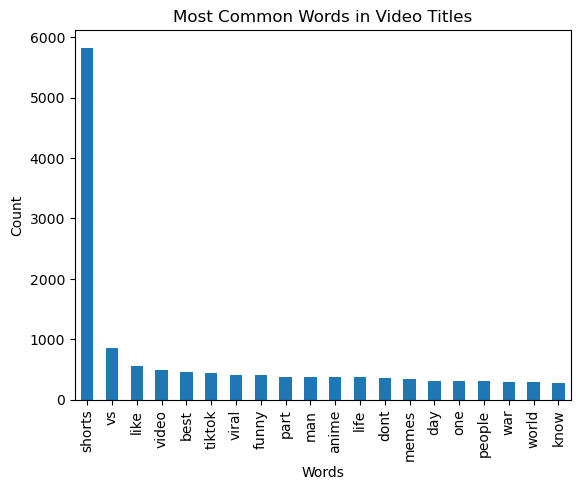

In [163]:
# Download the 'stopwords' package from NLTK, uncomment the next line if you haven't download it yet
# nltk.download('stopwords')


# Define the set of stop words and convert it to a list
stop_words = list(stopwords.words('english'))

# Add 'watched' and any other words you want to exclude
stop_words.extend(['watched', 'other_word_to_exclude'])


# Initialize a CountVectorizer object
# We set the 'stop_words' parameter to the list of stop words we defined earlier
# The 'token_pattern' parameter is also set to accept all unicode characters, 
# which includes non-English words
vectorizer = CountVectorizer(stop_words=stop_words, token_pattern=r'\b\w+\b')

# Fit and transform the 'title' column of the DataFrame
X = vectorizer.fit_transform(watch_df['title'])

# Sum up the counts of each word
word_counts = X.sum(axis=0)

# Get a list of the words
words = vectorizer.get_feature_names_out()

# Create a DataFrame from the words and their counts
counts_df = pd.DataFrame(word_counts, columns=words)

# Get the top 20 most common words
top_words = counts_df.sum().sort_values(ascending=False).head(20)

# Plot the most common words
top_words.plot(kind='bar')
plt.title('Most Common Words in Video Titles')
plt.xlabel('Words')
plt.ylabel('Count')
plt.show()



How can we classify the titles into different topics using NLP techniques like topic modeling?

In [159]:
# Preprocess the titles
# We'll make everything lower case and remove punctuation and numbers
watch_df['title'] = watch_df['title'].str.lower()
watch_df['title'] = watch_df['title'].str.replace('[^\w\s]','')
watch_df['title'] = watch_df['title'].str.replace('\d+', '')
watch_df['title'] = watch_df['title'].str.replace('watched ', '') # remove the 'watched' prefix

# Create a CountVectorizer to vectorize the titles
# We'll ignore common English stop words
vectorizer = CountVectorizer(stop_words=stop_words)

# Vectorize the titles
title_vectors = vectorizer.fit_transform(watch_df['title'])

# Create an LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=0)

# Fit the LDA model to the title vectors
lda.fit(title_vectors)

# For each topic, print out the top 10 most representative words
for i, topic in enumerate(lda.components_):
    print(f"Top 10 words for topic #{i}:")
    print([vectorizer.get_feature_names_out()[index] for index in topic.argsort()[-10:]])
    print("\n")

/var/folders/82/rx54lvmd1hz_l7fcq3sc7vdc0000gn/T/ipykernel_32599/3562346019.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  watch_df['title'] = watch_df['title'].str.replace('[^\w\s]','')
/var/folders/82/rx54lvmd1hz_l7fcq3sc7vdc0000gn/T/ipykernel_32599/3562346019.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  watch_df['title'] = watch_df['title'].str.replace('\d+', '')


Top 10 words for topic #0:
['war', 'world', 'history', 'people', 'got', 'scene', 'vs', 'dont', 'like', 'shorts']


Top 10 words for topic #1:
['get', 'movie', 'real', 'best', 'day', 'tiktok', 'life', 'naruto', 'anime', 'shorts']


Top 10 words for topic #2:
['countries', 'reject', 'embrace', 'ai', 'know', 'time', 'official', 'music', 'video', 'shorts']


Top 10 words for topic #3:
['best', 'like', 'funny', 'status', 'viral', 'boys', 'meme', 'sigma', 'vs', 'shorts']


Top 10 words for topic #4:
['china', 'part', 'explained', 'mr', 'incredible', 'found', 'vs', 'life', 'memes', 'shorts']




how can you classify the search terms into different topics using NLP techniques?

In [164]:

# Preprocess the search terms
search_df['title'] = search_df['title'].str.lower()
search_df['title'] = search_df['title'].str.replace('[^\w\s]','')
search_df['title'] = search_df['title'].str.replace('\d+', '')
search_df['title'] = search_df['title'].str.replace('searched for ', '') # remove the 'searched for' prefix


# Create a CountVecorizer with the custom stop words list
vectorizer = CountVectorizer(stop_words=stop_words)

# Vectorize the search terms
search_vectors = vectorizer.fit_transform(search_df['title'])

# Create an LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=0)

# Fit the LDA model to the search term vectors
lda.fit(search_vectors)

# For each topic, print put the top 10 most representative words
for i, topic in enumerate(lda.components_):
    print(f"Top 10 words for topic #{i}:")
    print([vectorizer.get_feature_names_out()[index] for index in topic.argsort()[-10:]])
    print("\n")


/var/folders/82/rx54lvmd1hz_l7fcq3sc7vdc0000gn/T/ipykernel_32599/3514754824.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  search_df['title'] = search_df['title'].str.replace('[^\w\s]','')
/var/folders/82/rx54lvmd1hz_l7fcq3sc7vdc0000gn/T/ipykernel_32599/3514754824.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  search_df['title'] = search_df['title'].str.replace('\d+', '')


Top 10 words for topic #0:
['icc', 'god', 'come', 'visited', 'cover', 'get', 'tutorial', 'university', 'song', 'guitar']


Top 10 words for topic #1:
['meal', 'shake', 'worlds', 'certificates', 'theme', 'man', 'career', 'bible', 'scene', 'google']


Top 10 words for topic #2:
['online', 'ad', 'seconds', 'need', 'superfood', 'honor', 'music', 'lord', 'kachava', 'trailer']


Top 10 words for topic #3:
['chosen', 'japanese', 'shop', 'scenes', 'world', 'psalm', 'movie', 'mongol', 'google', 'love']


Top 10 words for topic #4:
['good', 'getting', 'therapy', 'betterhelp', 'ost', 'vs', 'last', 'want', 'beard', 'samurai']




how can you analyze the sentiments of the video titles? Does it have any correlation with your watch time or watch frequency?

In [161]:
# Get the sentiment polarity of each title
watch_df['sentiment'] = watch_df['title'].apply(lambda title: TextBlob(title).sentiment.polarity)

# Compute the watch frequency of each title
watch_df['frequency'] = watch_df.groupby('title')['title'].transform('count')

# Compute the correlation between sentiment and frequency
correlation = np.corrcoef(watch_df['sentiment'], watch_df['frequency'])[0, 1]
print('Correlation between sentiment and watch frequency:', correlation)

# To compute the correlation with watch time, you would need a numeric representation of 'time', like timestamp
watch_df['timestamp'] = watch_df['time'].apply(lambda dt: dt.timestamp())
correlation_time = np.corrcoef(watch_df['sentiment'], watch_df['timestamp'])[0, 1]
print('Correlation between sentiment and watch time:', correlation_time)


Correlation between sentiment and watch frequency: 0.008138263082017975
Correlation between sentiment and watch time: -0.016794328219256617


how can we analyze the sentiments of the search terms and compare it with the sentiments of the video titles?

In [162]:
# Add a new column for the search term
search_df['search_term'] = search_df['title'].str.replace('Searched for ', '')

# Perform sentiment analysis on the search terms
search_df['search_term_sentiment'] = search_df['search_term'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Calculate the average sentiment of the search terms
average_search_sentiment = search_df['search_term_sentiment'].mean()
print('Average search term sentiment:', average_search_sentiment)


# Calculate the average sentiment of the video titles
average_title_sentiment = watch_df['sentiment'].mean()
print('Average video title sentiment:', average_title_sentiment)

# Compare the average sentiments
if average_search_sentiment > average_title_sentiment:
    print('On average, the search terms have a more positive sentiment than the video titles.')
elif average_search_sentiment < average_title_sentiment:
    print('On average, the video titles have a more positive sentiment than the search terms.')
else:
    print('On average, the search terms and video titles have the same sentiment.')



Average search term sentiment: 0.0318280572676709
Average video title sentiment: 0.046246752998413625
On average, the video titles have a more positive sentiment than the search terms.
